<h2>Optimisation M1 - TP1</h2>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

On considère la fonction quadratique suivante définie sur $[-3,3]\times[-3,3]$ par :
$$
f_1(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - 3x_1 + 30.
$$

1) Ecrire la fonction $\verb+f1+$ représentant $f_1$ en Python.

In [1]:
def f1(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] + x[0] - 3*x[1] + 30

2) Comprendre et utiliser la fonction plot_fonction définie ci-dessous.

In [2]:
def plot_fonction(f, dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrète.
    # f : fonction
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])
    
    # valeur et position du minimum sur la grille:
    imin = np.unravel_index(np.argmin(Z), Z.shape)
    Zmin = Z[imin]
    print('valeur du minimum sur la grille : ', Zmin)
    Xmin, Ymin = X[imin], Y[imin]
    print('position du minimiseur : (',Xmin,',',Ymin,')')
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.plot([Xmin, Xmin], [Ymin, Ymin], [0, Zmin], marker = 'o')
    ax.plot_surface(X, Y, Z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots(figsize = (6, 6))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, fontsize = 10)
    ax.set_title('Lignes de niveau')
    ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

valeur du minimum sur la grille :  28.00020201510063
position du minimiseur : ( -1.0100502512562815 , 1.0100502512562812 )


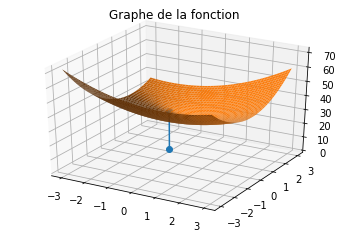

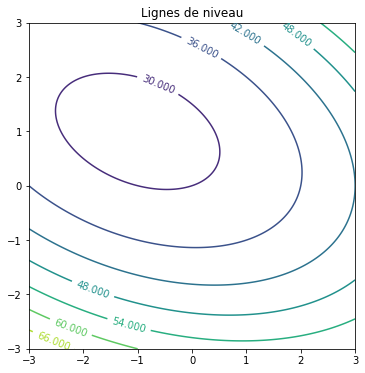

In [5]:
dom1 = [-3, 3, -3, 3]
plot_fonction(f1, dom1)

3) Donner la matrice symétrique $A$, le vecteur $b$ et la constante $c$ pour lesquelles
$$
f_1(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - 3x_1 + 30 = \frac{1}{2} \langle Ax, x \rangle - \langle b, x \rangle + c,
$$
où $x=(x_0,x_1)^T$.

4) Déterminer $\nabla f_1(x)$ pour tout $x$.

5) Calculer le minimiseur $x^*$ de $f_1$.

6) Ecrire la fonction $\verb+gradf1+$ représentant $\nabla f$ en Python.

In [6]:
def gradf1(x):
    gx = 2*x[0] + x[1] + 1
    gy = 4*x[1] + x[0] - 3
    return np.array([gx, gy])

7) Ecrire une fonction $\verb+plot+$_$\verb+grad+$ qui prend en argmument une fonction, son gradient, son domaine de définition et son minimum, et qui trace les contours de la fonction et son champs de gradient. On pourra penser à utiliser la fonction $\verb+plt.quiver+$.

In [7]:
def plot_grad(f, gradf, dom, xstar):
    
    # Affichage des lignes de niveau et du champ de gradients
    # d'une fonction de R^2 dans R
    # f : fonction
    # gradf : gradient de la fonction
    # dom : domaine de définition
    # xstar, ystar : minimiseur de la fonction sur le domaine
    
    X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])
    Xg, Yg = np.linspace(dom[0], dom[1], 20), np.linspace(dom[2], dom[3], 20) # grille plus grossiere
    Xg, Yg = np.meshgrid(Xg, Yg)
    u, v = gradf([Xg, Yg])
    
    fig, ax = plt.subplots(figsize = (8, 8))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, fontsize = 10)
    plt.plot(xstar[0], xstar[1], marker = '*', color = "r")
    plt.quiver(Xg, Yg, u, v)
    ax.set_aspect('equal', adjustable = 'box')

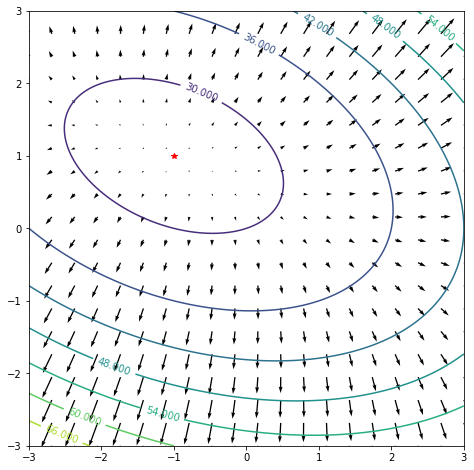

In [8]:
xstar = [-1,1]
plot_grad(f1, gradf1, dom1, xstar)
plt.show()

In [9]:
def descente_gradient(x0, f, gradf, alpha):
    x = x0
    x_list = [x0]
    while np.linalg.norm(gradf(x)) > 5*1e-2:
        x = x - alpha*gradf(x)
        x_list.append(x)
    
    return x, x_list

In [10]:
def plot_grad_descent(f, gradf, dom, xstar, xlist):
    
    # Affichage des lignes de niveau et du champ de gradients
    # d'une fonction de R^2 dans R
    # f : fonction
    # gradf : gradient de la fonction
    # dom : domaine de définition
    # xstar, ystar : minimiseur de la fonction sur le domaine
    
    X, Y = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])
    Xg, Yg = np.linspace(dom[0], dom[1], 20), np.linspace(dom[2], dom[3], 20) # grille plus grossiere
    Xg, Yg = np.meshgrid(Xg, Yg)
    u, v = gradf([Xg, Yg])
    
    fig, ax = plt.subplots(figsize = (8, 8))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, fontsize = 10)
    plt.quiver(Xg, Yg, u, v)
    Xlist = [xlist[i][0] for i in range(len(xlist))]
    Ylist = [xlist[i][1] for i in range(len(xlist))]
    plt.plot(Xlist, Ylist, marker = "o", ms = 4.0, color = "red")
    plt.plot(xstar[0], xstar[1], marker = '*', ms = 10.0, color = "r")
    ax.set_aspect('equal', adjustable = 'box')

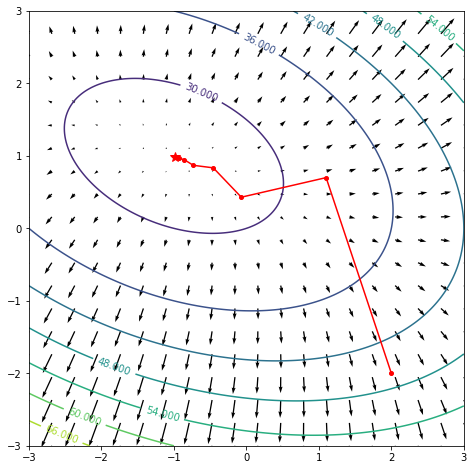

In [11]:
x0 = np.array([2, -2])
xstar_approx, x_list = descente_gradient(x0, f1, gradf1, 0.3)
plot_grad_descent(f1, gradf1, dom1, xstar_approx, x_list)
plt.show()